# SVM, KNN and RF evaluation on the dataset in the frequency domain

## Setting up the evaluation

### Importing the necessary libraries and setting things up

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
import os
import sys
import seaborn as sns
import tabulate
import matplotlib.pyplot as plt

In [2]:
REPO_ROOT_DIR = "../../"
sys.path.append(os.path.dirname(REPO_ROOT_DIR))
import src

In [3]:
from src.models import SVM
from src.models import KNN
from src.models import RF
from src.features import FFT

In [4]:
csv_path = os.path.join(REPO_ROOT_DIR, "data/raw/csv/")

In [5]:
sns.set_style("ticks")
plt.rcParams['savefig.dpi'] = 200
plt.rcParams["figure.dpi"] = 125

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})

## Setting up the data

### Reading the dataset

In [6]:
dataset = src.data.mit_bih_dataset.MIT_BIH_Dataset(path=csv_path)

In [7]:
X_data = dataset.get_X_data()
y_data = dataset.get_y_data()

### Getting the frequency representation

In [8]:
FFT = FFT.FFT(X_data)
FFT.transform()
X_data = FFT.get_transformed_data()

### Plot a signal from each class

In [9]:
class_0_index = np.where(y_data == 0)[0][0]
class_1_index = np.where(y_data == 1)[0][0]
class_2_index = np.where(y_data == 2)[0][0]
class_3_index = np.where(y_data == 3)[0][0]
class_4_index = np.where(y_data == 4)[0][0]
classes_index = [class_0_index, class_1_index, class_2_index, class_3_index, class_4_index]

legendas = ["Sem arritmia cardíaca", "Bloqueio de ramo esquerdo", "Bloqueio de ramo direito", "Contração atrial prematura", "Contração ventricular prematura"]

In [10]:
t = np.linspace(0,1,360)

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


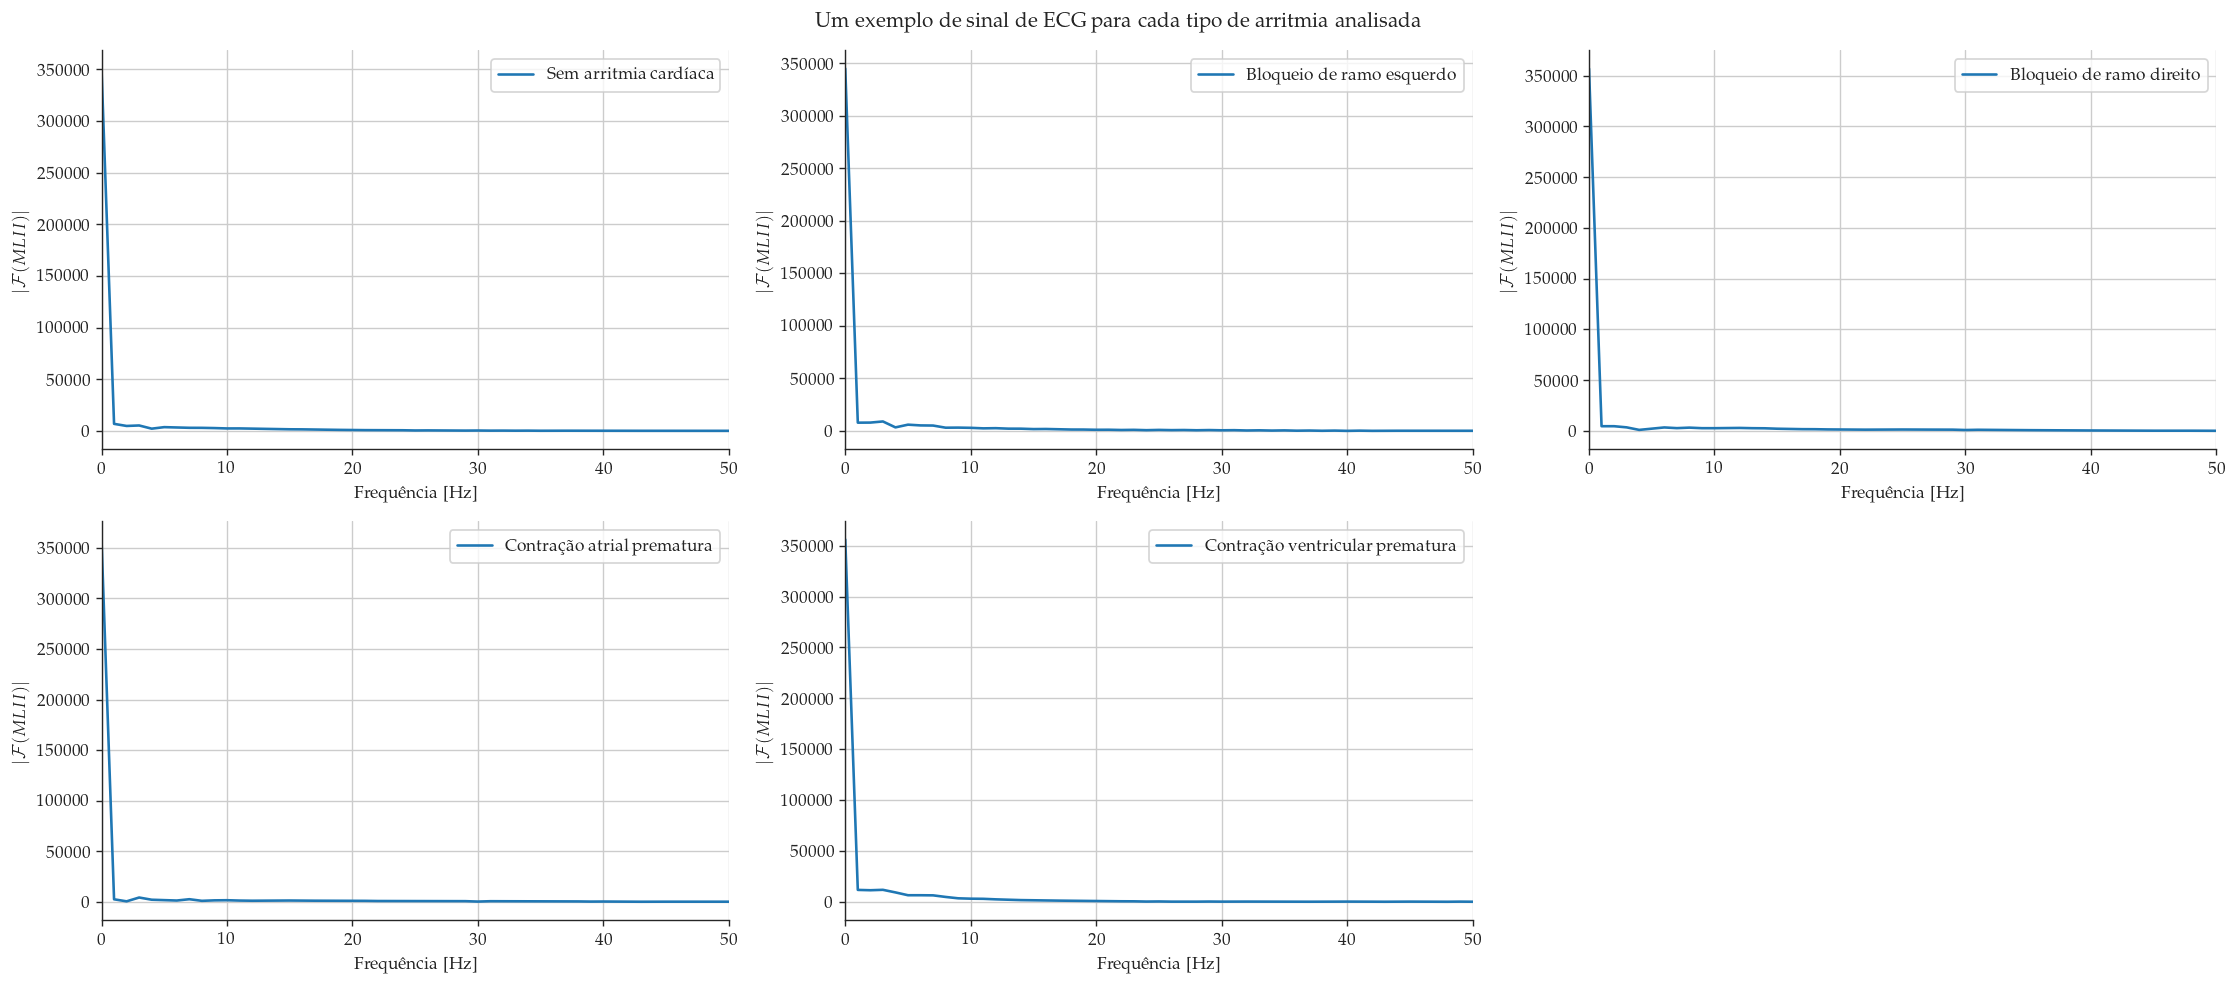

In [11]:
fig = plt.figure(tight_layout=True, figsize=(18,8))

for index, name in enumerate(classes_index):
    ax = fig.add_subplot(2, 3, index+1)
    ax.plot(X_data[name], label=legendas[index])
    ax.grid(True)
    ax.legend()
    ax.set_xlim(0,50)
    ax.set_ylabel("$|\mathcal{F}(MLII)|$")
    ax.set_xlabel("Frequência [Hz]")
    
fig.suptitle("Um exemplo de sinal de ECG para cada tipo de arritmia analisada")
sns.despine()
fig.savefig(REPO_ROOT_DIR + "figures/frequency-signals.pdf")

### Creating the test and train set

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, random_state=42)

## Evaluating the models

## SVM

In [13]:
svm_model = SVM.SVM_Model(X_train, y_train)
svm_model.fit()
svm_model.predict(X_test)
svm_metrics = svm_model.eval_model(y_test)

In [14]:
print("F-medida:", round(svm_metrics[0], 4), "| Acurácia:", round(svm_metrics[1], 4))

F-medida: 0.5882 | Acurácia: 0.5903


## RF

In [15]:
rf_model = RF.RF_Model(X_train, y_train)
rf_model.fit()
rf_model.predict(X_test)
rf_metrics = rf_model.eval_model(y_test)

In [16]:
print("F-medida:", round(rf_metrics[0], 4), "| Acurácia:", round(rf_metrics[1], 4))

F-medida: 0.9204 | Acurácia: 0.9202


## KNN

In [17]:
knn_model = KNN.KNN_Model(X_train, y_train)
knn_model.fit()
knn_model.predict(X_test)
knn_metrics = knn_model.eval_model(y_test)

In [18]:
print("F-medida:", round(knn_metrics[0], 4), "| Acurácia:", round(knn_metrics[1], 4))

F-medida: 0.8994 | Acurácia: 0.8995
